In [1]:
import matplotlib.pyplot as plt
import matplotlib
import mplcursors
import seaborn as sns
from shapely.geometry import Point
import geopy
from geopy.geocoders import Nominatim
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
from folium import plugins
#matplotlib.use('TkAgg')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/dassu/Downloads/Sheet 2_data.csv')


In [4]:
# Extract the columns for the scatter plot
x = df['Tot Benes']
y = df['pop_adj_amt']

In [5]:
# Extract the 'Classification' column for coloring
classification = df['Classification']

In [6]:
# Create a color map based on the 'Classification' column
colors = {'urban': 'blue', 'rural': 'red'}  # Define colors for each category

In [7]:
# Map the colors based on the 'Classification' column
color_list = [colors[c] for c in classification]

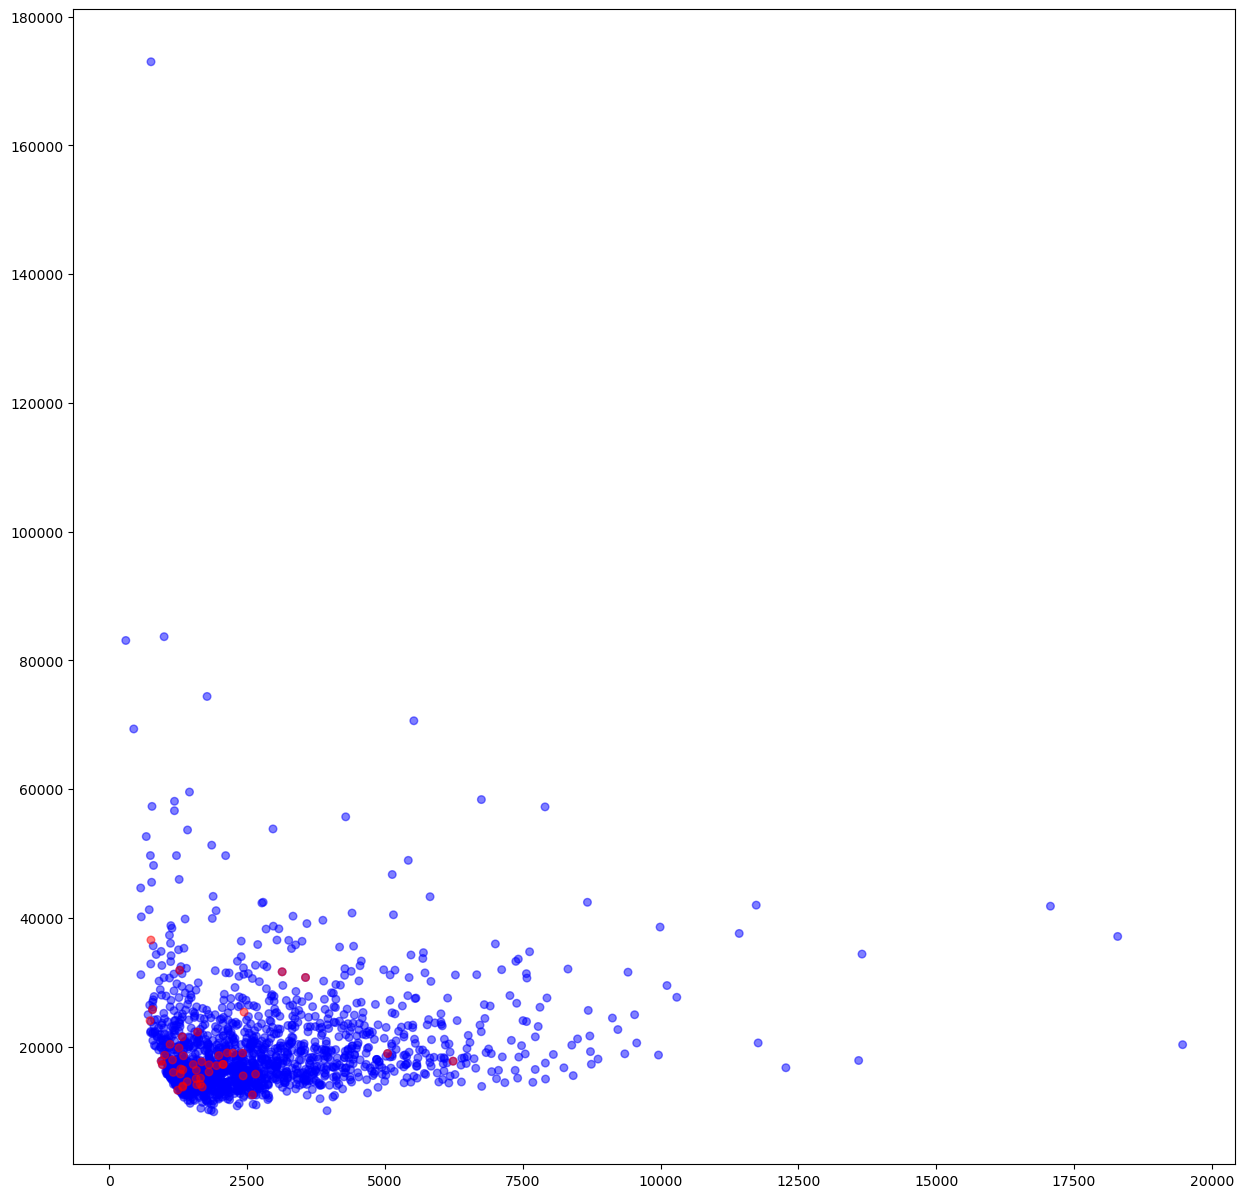

In [11]:
# Create the scatter plot with color mapping
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(x, y, c=color_list, s=30, alpha=0.5)

# Add labels and title
ax.set_xlabel('Total Beneficiaries')
ax.set_ylabel('Population Adjusted Amount')
ax.set_title('Scatter Plot of Total Beneficiaries vs. Population Adjusted Amount')

# Create a legend for the 'Classification' colors
for category, color in colors.items():
    ax.scatter([], [], c=color, label=category)
ax.legend()

# Adding tooltips showing all data for each point
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(x, y, c=color_list, s=30, alpha=0.5)
ax.set_xlabel('Total Beneficiaries')
ax.set_ylabel('Population Adjusted Amount')
ax.set_title('Scatter Plot of Total Beneficiaries vs. Population Adjusted Amount')
for category, color in colors.items():
    ax.scatter([], [], c=color, label=category)
ax.legend()
cursor = mplcursors.cursor(scatter, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=f'Tot Benes: {df["Tot Benes"][sel.target.index]}\n'
                            f'Population Adjusted Amount: {df["pop_adj_amt"][sel.target.index]}\n'
                            f'Classification: {df["Classification"][sel.target.index]}\n'
                            f'City: {df["Rndrng Prvdr City"][sel.target.index]}\n'
                            f'Org Name: {df["Rndrng Prvdr Org Name"][sel.target.index]}\n'
                            f'State: {df["Rndrng Prvdr State Abrvtn"][sel.target.index]}\n'
                            f'Zip: {df["Rndrng Prvdr Zip5"][sel.target.index]}\n'
                            f'Total Medicare Payment Amount: {df["Tot Mdcr Pymt Amt"][sel.target.index]}')

# Display the plot
#plt.show()

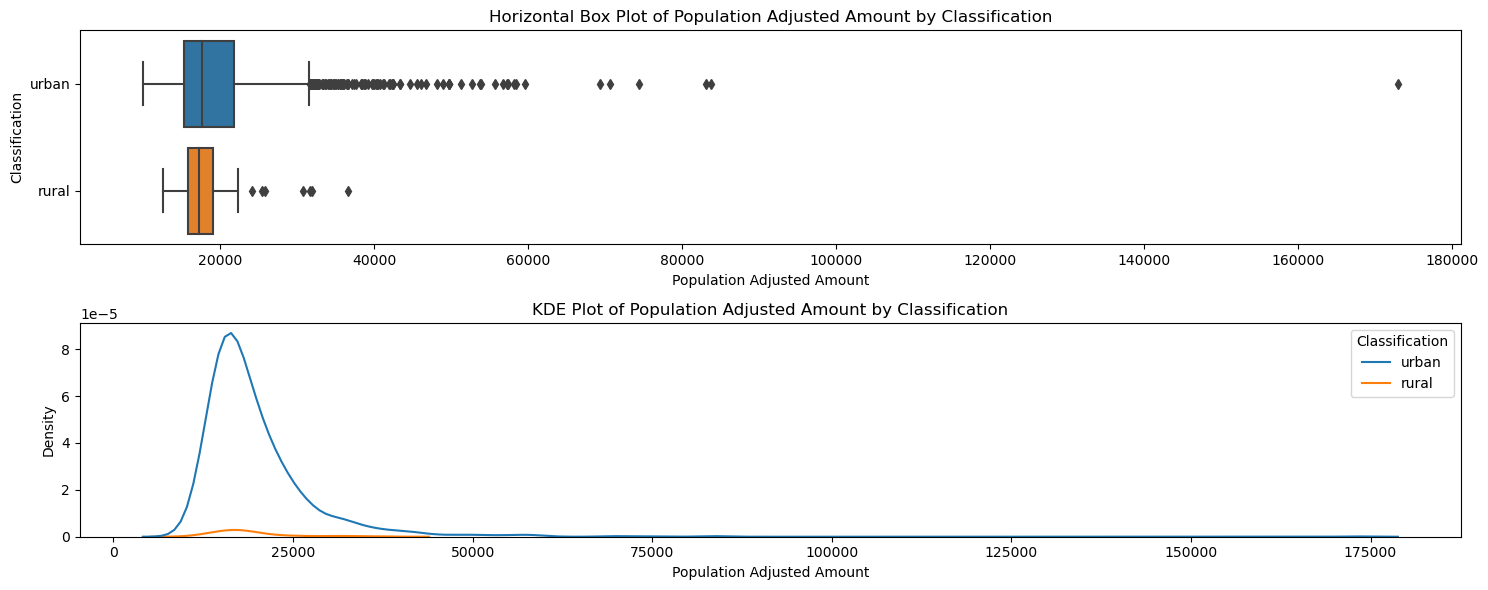

In [12]:
# Create a figure with two subplots (box plot and KDE plot)
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

# Box plot
sns.boxplot(x='pop_adj_amt', y='Classification', data=df, orient='h', ax=axes[0])
axes[0].set_title('Horizontal Box Plot of Population Adjusted Amount by Classification')
axes[0].set_xlabel('Population Adjusted Amount')
axes[0].set_ylabel('Classification')

# KDE plot
sns.kdeplot(data=df, x='pop_adj_amt', hue='Classification', ax=axes[1])
axes[1].set_title('KDE Plot of Population Adjusted Amount by Classification')
axes[1].set_xlabel('Population Adjusted Amount')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

In [134]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [135]:
geolocator = Nominatim(user_agent="Jupyter_Notebook")

In [136]:
def get_lat_long_from_zip(zip_code):
    try:
        location = geolocator.geocode(zip_code)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return get_lat_long_from_zip(zip_code)  # retry on timeout

In [137]:
df = pd.read_csv('/content/Sheet 2_data.csv')

In [138]:
# Process the data (ensuring the ZIP code is in the correct format)
df['Rndrng Prvdr Zip5'] = df['Rndrng Prvdr Zip5'].astype(str).str.zfill(5)

In [154]:
m = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

In [155]:
# Function to choose color based on classification
def choose_color(classification):
    return 'blue' if classification == 'urban' else 'red'

In [156]:
l=[]
l= df['Rndrng Prvdr Zip5'].tolist()

In [157]:
df['Rndrng Prvdr Zip5']=l

In [158]:
for i in range(len(l)):
    l[i]=l[i] + ', USA'

In [39]:
lt=[]
lo=[]
for i in range(len(l)):
    # We need to get the latitude and longitude for each ZIP code
    # This is a placeholder as the actual method to get lat, long from ZIP code will depend on your data source
    lat, long = get_lat_long_from_zip(l[i])
    lt.append(lat)
    lo.append(long)

In [159]:
# Function to scale the payment amount for icon size
def scale_icon_size(amount, scale_factor=0.0000001, min_size=0.5, max_size=5):
    size = max(min(amount * scale_factor, max_size), min_size)
    return int(size), int(size)

In [160]:

# Adding markers with BeautifyIcon
for i in range(len(l)):
    lat = (lt[i])
    long = (lo[i])
    if lat == None:
        continue
    icon_size = scale_icon_size(df.iloc[i]['Tot Mdcr Pymt Amt'])
    icon = plugins.BeautifyIcon(
        icon_shape='circle-dot',
        border_color=choose_color(df.iloc[i]['Classification']),
        border_width=icon_size[0],
        text_color=choose_color(df.iloc[i]['Classification']),
        inner_icon_style=f'margin-top:0; opacity: 0.5;'  # Adjusting the opacity here
        )
    folium.Marker(
            location=[lat, long],
            icon=icon,
            popup=f"{df.iloc[i]['Rndrng Prvdr Zip5']}: ${df.iloc[i]['Tot Mdcr Pymt Amt']}"
        ).add_to(m)

# Display the map
m


In [161]:
m.save("map.html")

In [13]:
df = pd.read_csv('C:/Users/dassu/Downloads/Sheet 4_Full Data_data.csv')

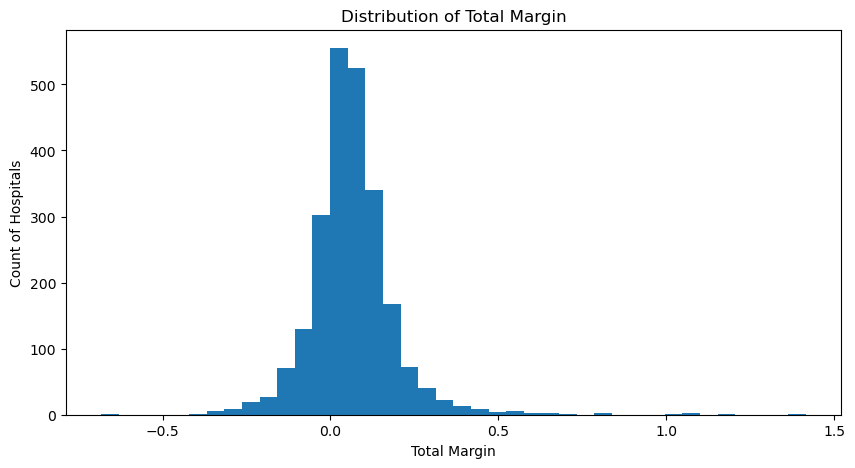

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df['Total Margin'], bins=40)
plt.title('Distribution of Total Margin')
plt.xlabel('Total Margin')
plt.ylabel('Count of Hospitals')
plt.show()

In [15]:
df = pd.read_csv('C:/Users/dassu/Downloads/Sheet 5_Full Data_data.csv')

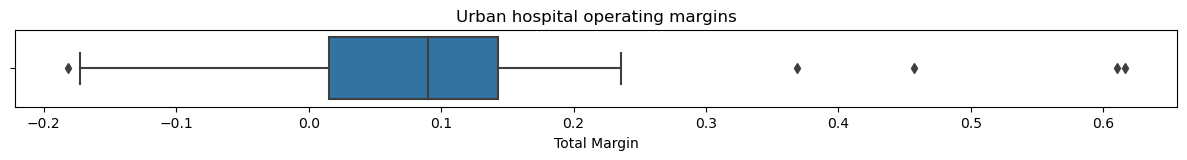

In [16]:
plt.figure(figsize=(15,1))
sns.boxplot(x='Total Margin', data=df, orient='h')
plt.title('Urban hospital operating margins')
plt.xlabel('Total Margin')
plt.show()

In [17]:
df = pd.read_csv('C:/Users/dassu/Downloads/Sheet 6_Full Data_data.csv')

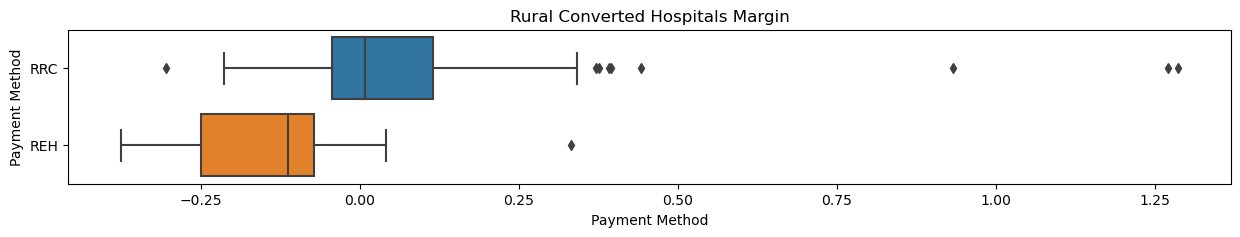

In [18]:
plt.figure(figsize=(15,2))
sns.boxplot(x='Total Margin', y='Payment Method', data=df, orient='h')
plt.title('Rural Converted Hospitals Margin')
plt.xlabel('Total Margin')
plt.xlabel('Payment Method')
plt.show()